In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Introduction


#### Any Changes


#### Data Cleaning 

#### Exploratory data analysis:

In [3]:
#178 neighborhoods in this data
df1 = pd.read_csv("databyneighborhood.csv")
df1.head()

Region Period Begin  Median Ppsf Median Sale Price
0  Chicago, IL - Albany Park    11/1/2011    78.400000             $154K
1  Chicago, IL - Albany Park    12/1/2011    76.800000             $122K
2  Chicago, IL - Albany Park     1/1/2012    77.929915             $129K
3  Chicago, IL - Albany Park     2/1/2012    80.898704             $131K
4  Chicago, IL - Albany Park     3/1/2012    98.397311             $141K

In [44]:
df1.tail()

Region Period Begin  Median Ppsf Median Sale Price
15389  Chicago, IL - Wrightwood    10/1/2018   115.823817             $183K
15390  Chicago, IL - Wrightwood    11/1/2018   339.663980             $632K
15391  Chicago, IL - Wrightwood    11/1/2018   124.815317             $169K
15392  Chicago, IL - Wrightwood    12/1/2018   127.524222             $168K
15393  Chicago, IL - Wrightwood    12/1/2018   338.888889             $638K

In [45]:
df2 = pd.read_csv("0To500010.csv")
groupByNeighborhood = df2.groupby('Neighborhood')
selectedNeighborhood = groupByNeighborhood.get_group('Austin')
print(len(groupByNeighborhood))
df2.head()

101


Unnamed: 0  Unnamed: 0.1        ID Case Number                    Date  \
0           0             0  10000092    HY189866  03/18/2015 07:44:00 PM   
1           1             1  10000094    HY190059  03/18/2015 11:00:00 PM   
2           2             2  10000095    HY190052  03/18/2015 10:45:00 PM   
3           3             3  10000096    HY190054  03/18/2015 10:30:00 PM   
4           4             4  10000097    HY189976  03/18/2015 09:00:00 PM   

                    Block  IUCR   Primary Type              Description  \
0         047XX W OHIO ST  041A        BATTERY      AGGRAVATED: HANDGUN   
1  066XX S MARSHFIELD AVE  4625  OTHER OFFENSE         PAROLE VIOLATION   
2   044XX S LAKE PARK AVE  0486        BATTERY  DOMESTIC BATTERY SIMPLE   
3    051XX S MICHIGAN AVE  0460        BATTERY                   SIMPLE   
4        047XX W ADAMS ST  031A        ROBBERY           ARMED: HANDGUN   

  Location Description                        ...                          \
0               STREET                        ...                           
1               STREET                        ...                           
2            APARTMENT                        ...                           
3            APARTMENT                        ...                           
4             SIDEWALK                        ...                           

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1144606.0     1903566.0  2015  02/10/2018 03:50:01 PM  41.891399   
1     1166468.0     1860715.0  2015  02/10/2018 03:50:01 PM  41.773372   
2     1185075.0     1875622.0  2015  02/10/2018 03:50:01 PM  41.813861   
3     1178033.0     1870804.0  2015  02/10/2018 03:50:01 PM  41.800802   
4     1144920.0     1898709.0  2015  02/10/2018 03:50:01 PM  41.878065   

   Longitude                       Location     Neighborhood  Zipcode  \
0 -87.744385  (41.891398861, -87.744384567)           Austin  60644.0   
1 -87.665319  (41.773371528, -87.665319468)   West Englewood  60636.0   
2 -87.596643   (41.81386068, -87.596642837)          Kenwood  60653.0   
3 -87.622619  (41.800802415, -87.622619343)  Washington Park  60615.0   
4 -87.743354  (41.878064761, -87.743354013)           Austin  60644.0   

                                             Address  
0  {'address': {'Match_addr': '4700-4728 W Ohio S...  
1  {'address': {'Match_addr': '6601-6699 S Marshf...  
2  {'address': {'Match_addr': '4431-4477 S Lake P...  
3  {'address': {'Match_addr': '5100-5198 S Michig...  
4  {'address': {'Match_addr': '4700-4798 W Adams ...  

[5 rows x 27 columns]

#### Hypothesis Testing
One of our hypotheses is that house price is correlated with the number of crime in a region. We 

In [24]:
def fun(df, neighborhood, year):
    cnt = 0.0
    total = 0

    for e,f,g in zip(df['Region'],df['Period Begin'],df['Median Ppsf']):
        date = f.split("/")
        try:
            if int(date[2]) == year and e == neighborhood:
                cnt = cnt + 1
                total = total + float(g)
        except:
            pass

    return total/cnt

In [25]:
i = 2012
while i < 2019:
    fun(df1, 'Chicago, IL - Albany Park', i)
    i = i + 1

In [36]:
def plot(df, neighborhood):
    x = np.zeros(7)
    
    y=[2012,2013,2014,2015,2016,2017,2018]
    
    for i in y:
        x[i-2012]=fun(df, neighborhood,i)
        
    plt.plot(y, x)

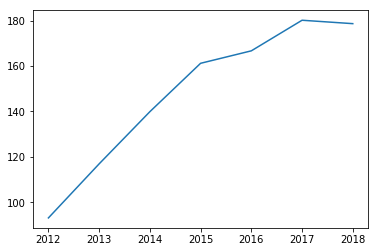

In [47]:
plot(df1,'Chicago, IL - Albany Park')

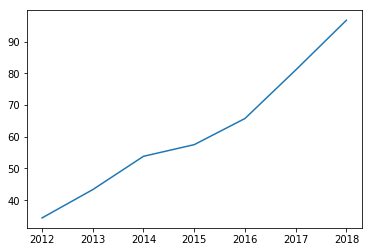

In [48]:
newlist=plot(df1,'Chicago, IL - Austin')

C:\Users\Raquib\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Raquib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


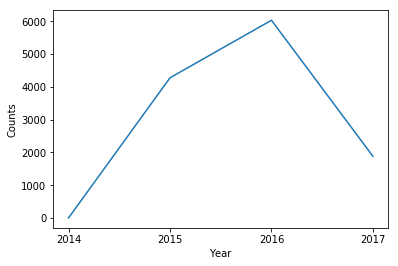

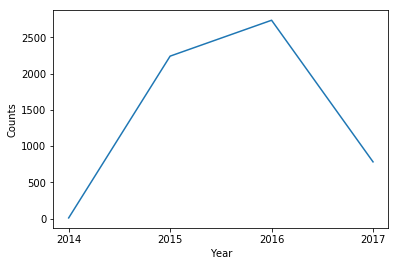

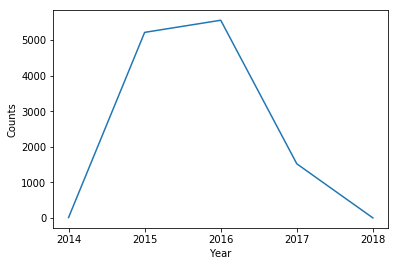

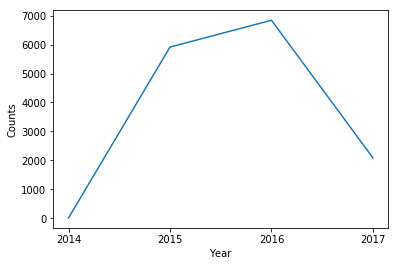

In [40]:
def plotCrimeNumbers(neighborhood):
    neighborhoodData = groupByNeighborhood.get_group(neighborhood)
    neighborhoodData['Date'] = pd.to_datetime(neighborhoodData['Date'])
    neighborhoodData['Year'] = pd.DatetimeIndex(neighborhoodData['Date']).year
    groupedByYear = neighborhoodData.groupby('Year')
    DataToPlot = pd.DataFrame(data = groupedByYear.size().reset_index(name='Counts'))
    #DataToPlot.columns = ['Year','Count']
    #print(DataToPlot['Count'])
    sns.lineplot(x="Year", y="Counts", data=DataToPlot)
    ax = plt.gca()
    ax.set_xticks(np.arange(DataToPlot['Year'][0], DataToPlot['Year'][DataToPlot['Year'].count()-1]+1 , 1))
    plt.show()

plotCrimeNumbers('Loop')
plotCrimeNumbers('Irving Park')
plotCrimeNumbers('Englewood')
plotCrimeNumbers('Auburn Gresham')
